# Multilingual Sentiment Analysis (1/2)
with dataset available on Kaggle: https://www.kaggle.com/datasets/suraj520/multi-task-learning


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("multilingual_sentiment_data.csv")
df

,tweet,language,sentiment
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars
1,This is a guest post by The Joy of Truth. To r...,en,4 stars
2,Nous sommes tous conscients de la popularité d...,fr,5 stars
3,El baño en el sistema de metro de la ciudad de...,es,4 stars
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars
...,...,...,...
4912,\nA former CIA officer and CIA director has pl...,en,1 star
4913,"Karen M. Felt, Ph.D. La ricerca è stata condot...",it,4 stars
4914,"Mit all der Aufmerksamkeit, die dem Thema Abtr...",de,2 stars
4915,L'élément le plus important dans le processus ...,fr,4 stars


In [3]:
import random
frase_casuale = random.choice(df["tweet"])
print(frase_casuale)

(CNN) -- Un joven acusado de disparar fatalmente a un oficial de policía durante un encuentro en un suburbio de Minneapolis es acusado en un incidente separado.


### Data cleaning

In [4]:
import re
import string

In [6]:
# remove punctuation from strings
def pulizia1(testo):
  testo1 = testo.translate(str.maketrans('', '', string.punctuation))
  if not testo1:
    return None
  return testo1

df["tweet2"] = df["tweet"].apply(pulizia1)
df

,tweet,language,sentiment,tweet2
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars,Lionel Messi que ha estado vinculado con un tr...
1,This is a guest post by The Joy of Truth. To r...,en,4 stars,This is a guest post by The Joy of Truth To re...
2,Nous sommes tous conscients de la popularité d...,fr,5 stars,Nous sommes tous conscients de la popularité d...
3,El baño en el sistema de metro de la ciudad de...,es,4 stars,El baño en el sistema de metro de la ciudad de...
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars,Ich habe dies seit über 20 Jahren getan und ic...
...,...,...,...,...
4912,\nA former CIA officer and CIA director has pl...,en,1 star,\nA former CIA officer and CIA director has pl...
4913,"Karen M. Felt, Ph.D. La ricerca è stata condot...",it,4 stars,Karen M Felt PhD La ricerca è stata condotta p...
4914,"Mit all der Aufmerksamkeit, die dem Thema Abtr...",de,2 stars,Mit all der Aufmerksamkeit die dem Thema Abtre...
4915,L'élément le plus important dans le processus ...,fr,4 stars,Lélément le plus important dans le processus d...


In [7]:
df.isnull().sum()

tweet         0
language      0
sentiment     0
tweet2       10
dtype: int64

In [8]:
df = df.dropna()

In [9]:
# all text to lower and remove spaces before and after

def pulizia2(testo):
  testo = testo.lower()
  testo = testo.strip()
  if not testo:
    return None
  return testo

df["tweet2"] = df["tweet2"].apply(pulizia2)
df

C:\Users\lucre\AppData\Local\Temp\ipykernel_9088\2561717567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet2"] = df["tweet2"].apply(pulizia2)


,tweet,language,sentiment,tweet2
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars,lionel messi que ha estado vinculado con un tr...
1,This is a guest post by The Joy of Truth. To r...,en,4 stars,this is a guest post by the joy of truth to re...
2,Nous sommes tous conscients de la popularité d...,fr,5 stars,nous sommes tous conscients de la popularité d...
3,El baño en el sistema de metro de la ciudad de...,es,4 stars,el baño en el sistema de metro de la ciudad de...
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars,ich habe dies seit über 20 jahren getan und ic...
...,...,...,...,...
4912,\nA former CIA officer and CIA director has pl...,en,1 star,a former cia officer and cia director has plea...
4913,"Karen M. Felt, Ph.D. La ricerca è stata condot...",it,4 stars,karen m felt phd la ricerca è stata condotta p...
4914,"Mit all der Aufmerksamkeit, die dem Thema Abtr...",de,2 stars,mit all der aufmerksamkeit die dem thema abtre...
4915,L'élément le plus important dans le processus ...,fr,4 stars,lélément le plus important dans le processus d...


In [10]:
df.isnull().sum()

tweet         0
language      0
sentiment     0
tweet2       56
dtype: int64

In [11]:
df = df.dropna()

In [12]:
# remove special character \n from string

def pulizia3(testo):
  testo = testo.replace("\n", "")
  if not testo:
    return None
  return testo

df["tweet2"] = df["tweet2"].apply(pulizia3)
df

C:\Users\lucre\AppData\Local\Temp\ipykernel_9088\1915215107.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet2"] = df["tweet2"].apply(pulizia3)


,tweet,language,sentiment,tweet2
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars,lionel messi que ha estado vinculado con un tr...
1,This is a guest post by The Joy of Truth. To r...,en,4 stars,this is a guest post by the joy of truth to re...
2,Nous sommes tous conscients de la popularité d...,fr,5 stars,nous sommes tous conscients de la popularité d...
3,El baño en el sistema de metro de la ciudad de...,es,4 stars,el baño en el sistema de metro de la ciudad de...
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars,ich habe dies seit über 20 jahren getan und ic...
...,...,...,...,...
4912,\nA former CIA officer and CIA director has pl...,en,1 star,a former cia officer and cia director has plea...
4913,"Karen M. Felt, Ph.D. La ricerca è stata condot...",it,4 stars,karen m felt phd la ricerca è stata condotta p...
4914,"Mit all der Aufmerksamkeit, die dem Thema Abtr...",de,2 stars,mit all der aufmerksamkeit die dem thema abtre...
4915,L'élément le plus important dans le processus ...,fr,4 stars,lélément le plus important dans le processus d...


In [13]:
df.isnull().any()

tweet        False
language     False
sentiment    False
tweet2       False
dtype: bool

In [14]:
df["language"].value_counts()

fr    976
de    975
en    974
it    968
es    958
Name: language, dtype: int64

In [15]:
# remove rows with tweet length < 50 char or without letters
indici_da_elim = df[df['tweet2'].apply(lambda x: len(x) < 50 or bool(re.match("^\d+$", x)))].index
df = df.drop(indici_da_elim)

### Check how many rows are left

In [17]:
df["sentiment"].value_counts()

1 star     1373
4 stars    1064
5 stars     998
3 stars     920
2 stars     437
Name: sentiment, dtype: int64

In [18]:
label_mapping = {"1 star": "Negative", "2 stars": "Negative", "3 stars": "Neutral", "4 stars": "Positive", "5 stars": "Positive"}
df["sentiment"] = [label_mapping[label] for label in df["sentiment"]]

In [19]:
df["sentiment"].value_counts()

Positive    2062
Negative    1810
Neutral      920
Name: sentiment, dtype: int64

### Create separate df for each language, each with an 80% train and 20% test

In [20]:
gruppi = df.groupby('language')
gruppi

In [21]:
from sklearn.model_selection import train_test_split
train_en, test_en = train_test_split(gruppi.get_group("en"), test_size=0.2, stratify=gruppi.get_group("en")["sentiment"], random_state=42)
train_es, test_es = train_test_split(gruppi.get_group("es"), test_size=0.2, stratify=gruppi.get_group("es")["sentiment"], random_state=42)
train_fr, test_fr = train_test_split(gruppi.get_group("fr"), test_size=0.2, stratify=gruppi.get_group("fr")["sentiment"], random_state=42)
train_de, test_de = train_test_split(gruppi.get_group("de"), test_size=0.2, stratify=gruppi.get_group("de")["sentiment"], random_state=42)
train_it, test_it = train_test_split(gruppi.get_group("it"), test_size=0.2, stratify=gruppi.get_group("it")["sentiment"], random_state=42)

## Traning the models on the same language and testing on a different one

They al look the same: we create a TfidVectorizer and we fit it on the training set, then we transform also the test set. We train a SVM and predict the score. Evaluation is made on Accuracy 

### Training on Italian, testing on Spanish

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_it = vectorizer.fit_transform(train_it["tweet2"])
y_it = train_it["sentiment"]

In [23]:
X_test_es = vectorizer.transform(test_es["tweet2"])
y_test_es = test_es["sentiment"]

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0, decision_function_shape='ovo')
svm.fit(X_it, y_it)

SVC(decision_function_shape='ovo', kernel='linear')

In [25]:
y_pred = svm.predict(X_test_es)

In [26]:
accuracy = accuracy_score(y_test_es, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.5421052631578948


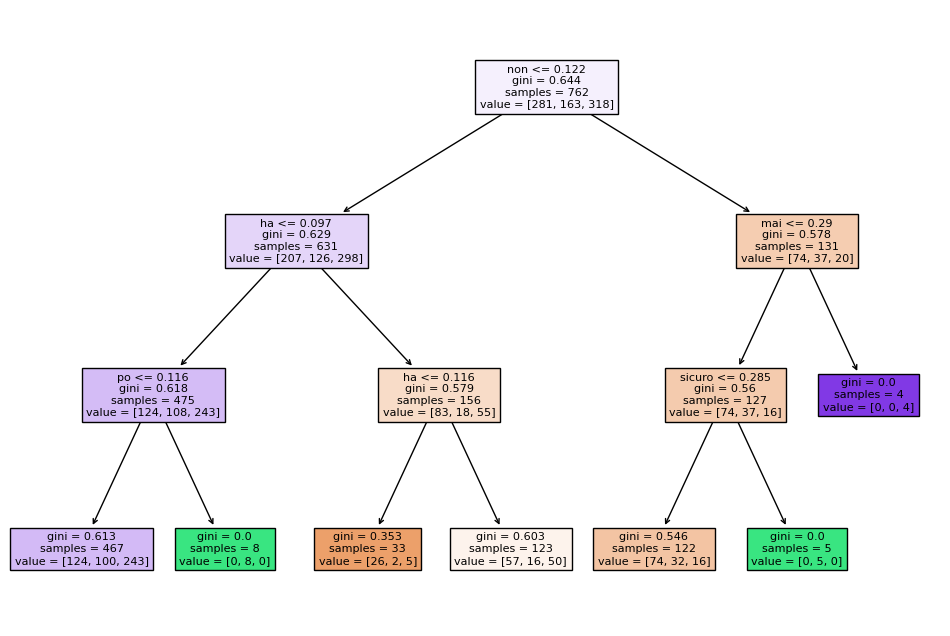

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_it, y_it)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(vectorizer.get_feature_names_out()))
plt.show()

### Training on Italian, testing on English

In [28]:
X_test_en = vectorizer.transform(test_en["tweet2"])
y_test_en = test_en["sentiment"]

In [29]:
y_pred = svm.predict(X_test_en)

In [30]:
accuracy = accuracy_score(y_test_en, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.40932642487046633


### Training on Italian, testing on German

In [31]:
X_test_de = vectorizer.transform(test_de["tweet2"])
y_test_de = test_de["sentiment"]

In [32]:
y_pred = svm.predict(X_test_de)

In [33]:
accuracy = accuracy_score(y_test_de, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.48704663212435234


### Training on Italian, testing on French

In [34]:
X_test_fr = vectorizer.transform(test_fr["tweet2"])
y_test_fr = test_fr["sentiment"]

In [35]:
y_pred = svm.predict(X_test_fr)

In [36]:

accuracy = accuracy_score(y_test_fr, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.35751295336787564


### Training on Italian, testing on Italian (baseline)

In [37]:
X_test_it = vectorizer.transform(test_it["tweet2"])
y_test_it = test_it["sentiment"]

In [38]:
y_pred = svm.predict(X_test_it)

In [39]:

accuracy = accuracy_score(y_test_it, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.612565445026178


### Training on Spanish, testing on Italian

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_es = vectorizer.fit_transform(train_es["tweet2"])
y_es = train_es["sentiment"]

In [41]:
X_test_it = vectorizer.transform(test_it["tweet2"])
y_test_it = test_it["sentiment"]

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_es, y_es)

SVC(kernel='linear')

In [43]:
y_pred = svm.predict(X_test_it)

In [44]:
accuracy = accuracy_score(y_test_it, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.45549738219895286


### Training on Spanish, testing on English

In [45]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_es, y_es)

SVC(kernel='linear')

In [46]:
X_test_en = vectorizer.transform(test_en["tweet"])
y_test_en = test_en["sentiment"]

In [47]:
y_pred = svm.predict(X_test_en)

In [48]:
accuracy = accuracy_score(y_test_en, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.43005181347150256


### Training on Spanish, testing on German

In [49]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_es, y_es)

SVC(kernel='linear')

In [50]:
X_test_de = vectorizer.transform(test_de["tweet"])
y_test_de = test_de["sentiment"]

In [51]:
y_pred = svm.predict(X_test_de)

In [52]:
accuracy = accuracy_score(y_test_de, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.49740932642487046


### Training on Spanish, testing on French

In [53]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_es, y_es)

SVC(kernel='linear')

In [54]:
X_test_fr = vectorizer.transform(test_fr["tweet"])
y_test_fr = test_fr["sentiment"]

In [55]:
y_pred = svm.predict(X_test_fr)

In [56]:
accuracy = accuracy_score(y_test_fr, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.45077720207253885


### Training on Spanish, testing on Spanish (baseline)

In [57]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_es, y_es)

SVC(kernel='linear')

In [58]:
X_test_es = vectorizer.transform(test_es["tweet"])
y_test_es = test_es["sentiment"]

In [59]:
y_pred = svm.predict(X_test_es)

In [60]:
accuracy = accuracy_score(y_test_es, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.631578947368421


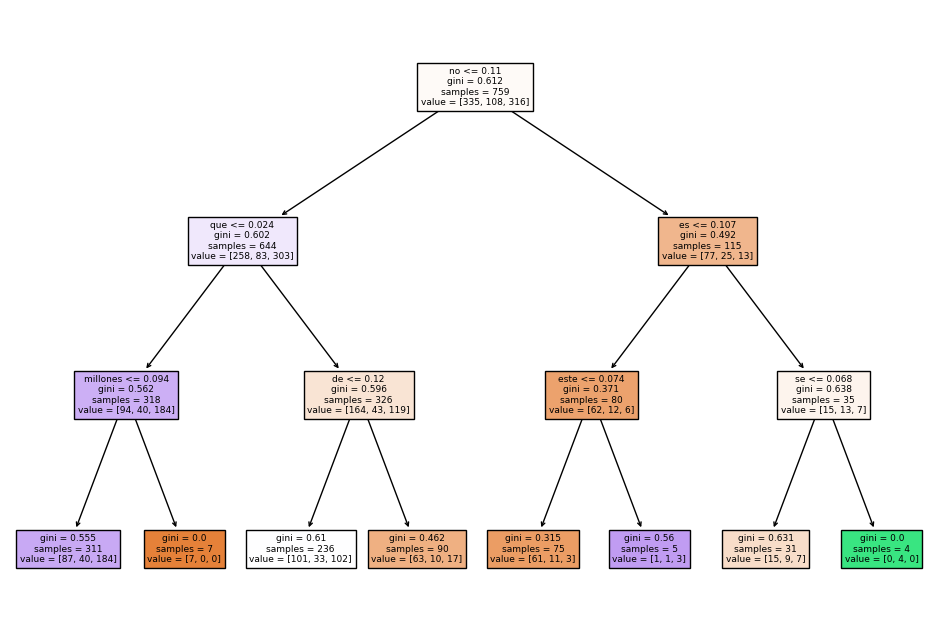

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_es, y_es)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(vectorizer.get_feature_names_out()))
plt.show()

### Training on English, testing on German

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_en = vectorizer.fit_transform(train_en["tweet"])
y_en = train_en["sentiment"]

In [63]:
X_test_de = vectorizer.transform(test_de["tweet"])
y_test_de = test_de["sentiment"]

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_en, y_en)

SVC(kernel='linear')

In [65]:
y_pred = svm.predict(X_test_de)

In [66]:
accuracy = accuracy_score(y_test_de, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.44041450777202074


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test_de, y_pred)

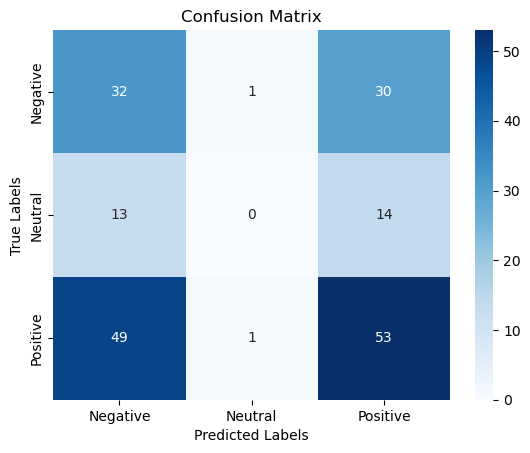

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot della matrice di confusione utilizzando Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Training on English, testing on Italian

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_en = vectorizer.fit_transform(train_en["tweet"])
y_en = train_en["sentiment"]

In [70]:
X_test_it = vectorizer.transform(test_it["tweet"])
y_test_it = test_it["sentiment"]

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_en, y_en)

SVC(kernel='linear')

In [72]:
y_pred = svm.predict(X_test_it)

In [73]:
accuracy = accuracy_score(y_test_it, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.4607329842931937


In [74]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report:")
print(classification_report(y_test_it, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.44      0.63      0.52        70
     Neutral       0.00      0.00      0.00        41
    Positive       0.49      0.55      0.52        80

    accuracy                           0.46       191
   macro avg       0.31      0.39      0.35       191
weighted avg       0.37      0.46      0.41       191



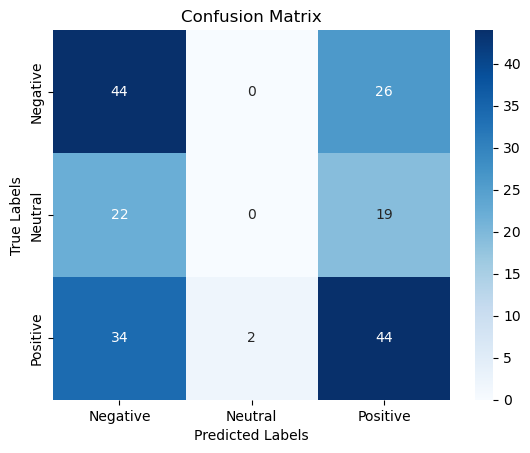

In [75]:
conf_matrix = confusion_matrix(y_test_it, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot della matrice di confusione utilizzando Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Training on English, testing on French

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_en = vectorizer.fit_transform(train_en["tweet"])
y_en = train_en["sentiment"]

In [77]:
X_test_fr = vectorizer.transform(test_fr["tweet"])
y_test_fr = test_fr["sentiment"]

In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_en, y_en)

SVC(kernel='linear')

In [79]:
y_pred = svm.predict(X_test_fr)

In [80]:

accuracy = accuracy_score(y_test_fr, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.41450777202072536


### Training on English, testing on Spanish

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_en = vectorizer.fit_transform(train_en["tweet"])
y_en = train_en["sentiment"]

In [82]:
X_test_es = vectorizer.transform(test_es["tweet"])
y_test_es = test_es["sentiment"]

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_en, y_en)

SVC(kernel='linear')

In [84]:
y_pred = svm.predict(X_test_es)

In [85]:


accuracy = accuracy_score(y_test_es, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.5526315789473685


### Training on English, testing on English (baseline)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_en = vectorizer.fit_transform(train_en["tweet"])
y_en = train_en["sentiment"]

In [87]:
X_test_en = vectorizer.transform(test_en["tweet"])
y_test_en = test_en["sentiment"]

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_en, y_en)

SVC(kernel='linear')

In [89]:
y_pred = svm.predict(X_test_en)

In [91]:
accuracy = accuracy_score(y_test_en, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.6476683937823834


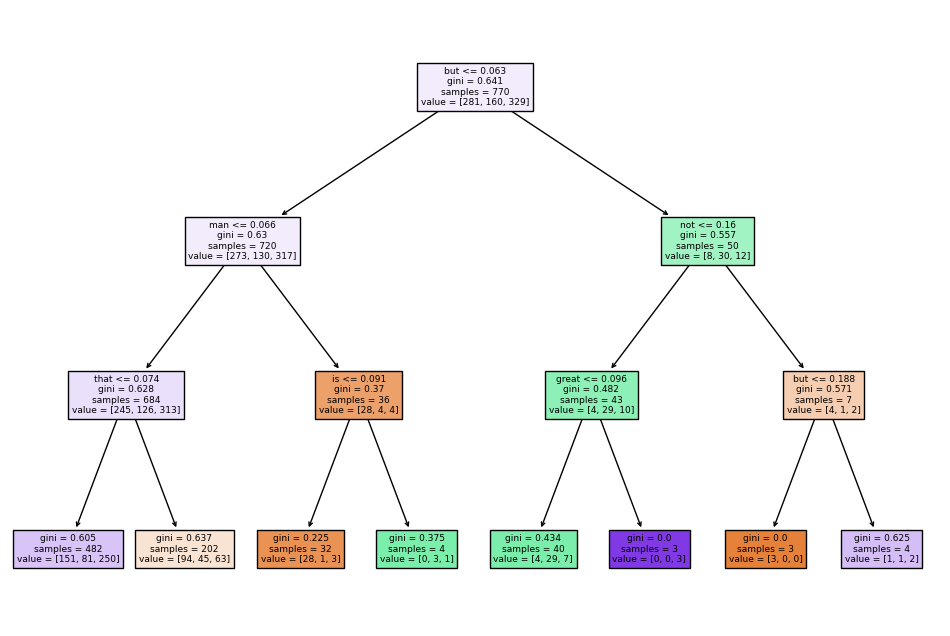

In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_en, y_en)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(vectorizer.get_feature_names_out()))
plt.show()

### Training on French, testing on Spanish

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_fr = vectorizer.fit_transform(train_fr["tweet"])
y_fr = train_fr["sentiment"]

In [94]:
X_test_es = vectorizer.transform(test_es["tweet"])
y_test_es = test_es["sentiment"]

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_fr, y_fr)

SVC(kernel='linear')

In [96]:
y_pred = svm.predict(X_test_es)

In [97]:
accuracy = accuracy_score(y_test_es, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.48947368421052634


### Training on French, testing on German

In [98]:
X_test_de = vectorizer.transform(test_de["tweet"])
y_test_de = test_de["sentiment"]

In [99]:
y_pred = svm.predict(X_test_de)

In [101]:
accuracy = accuracy_score(y_test_de, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.5077720207253886


### Training on French, testing on Italian

In [102]:
X_test_it = vectorizer.transform(test_it["tweet"])
y_test_it = test_it["sentiment"]

In [103]:
y_pred = svm.predict(X_test_it)

In [104]:
accuracy = accuracy_score(y_test_it, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.450261780104712


### Training on French, testing on French (baseline)

In [105]:
X_test_fr = vectorizer.transform(test_fr["tweet"])
y_test_fr = test_fr["sentiment"]

In [106]:
y_pred = svm.predict(X_test_fr)

In [107]:
accuracy = accuracy_score(y_test_fr, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.5440414507772021


### Training on French, testing on English

In [108]:
X_test_en = vectorizer.transform(test_en["tweet"])
y_test_en = test_en["sentiment"]

In [109]:
y_pred = svm.predict(X_test_en)

In [110]:

accuracy = accuracy_score(y_test_en, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.44559585492227977


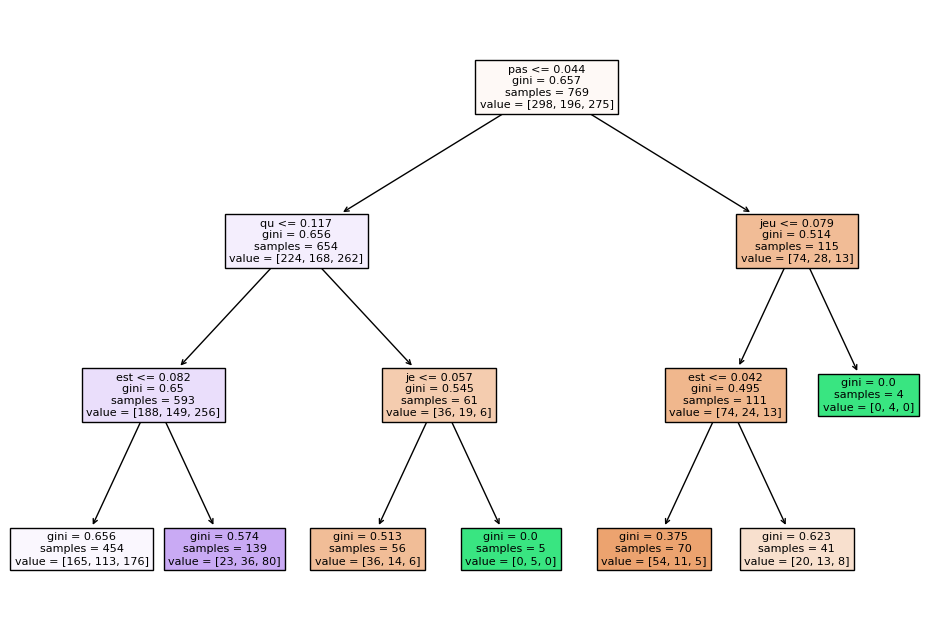

In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_fr, y_fr)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(vectorizer.get_feature_names_out()))
plt.show()

### Training on German, testing on English

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_de = vectorizer.fit_transform(train_de["tweet"])
y_de = train_de["sentiment"]

In [113]:
X_test_en = vectorizer.transform(test_en["tweet"])
y_test_en = test_en["sentiment"]

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_de, y_de)

SVC(kernel='linear')

In [115]:
y_pred = svm.predict(X_test_en)

In [116]:
accuracy = accuracy_score(y_test_en, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.43523316062176165


### Training on German, testing on French

In [117]:
X_test_fr = vectorizer.transform(test_fr["tweet"])
y_test_fr = test_fr["sentiment"]

In [118]:
y_pred = svm.predict(X_test_fr)

In [119]:
accuracy = accuracy_score(y_test_fr, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.37305699481865284


### Training on German, testing on Italian

In [120]:
X_test_it = vectorizer.transform(test_it["tweet"])
y_test_it = test_it["sentiment"]

In [121]:
y_pred = svm.predict(X_test_it)

In [122]:
accuracy = accuracy_score(y_test_it, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.46596858638743455


### Training on German, testing on German (baseline)

In [123]:
X_test_de = vectorizer.transform(test_de["tweet"])
y_test_de = test_de["sentiment"]

In [124]:
y_pred = svm.predict(X_test_de)

In [125]:
accuracy = accuracy_score(y_test_de, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.6528497409326425


### Training on German, testing on Spanish

In [126]:
X_test_es = vectorizer.transform(test_es["tweet"])
y_test_es = test_es["sentiment"]

In [127]:
y_pred = svm.predict(X_test_es)

In [129]:
accuracy = accuracy_score(y_test_es, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.48947368421052634


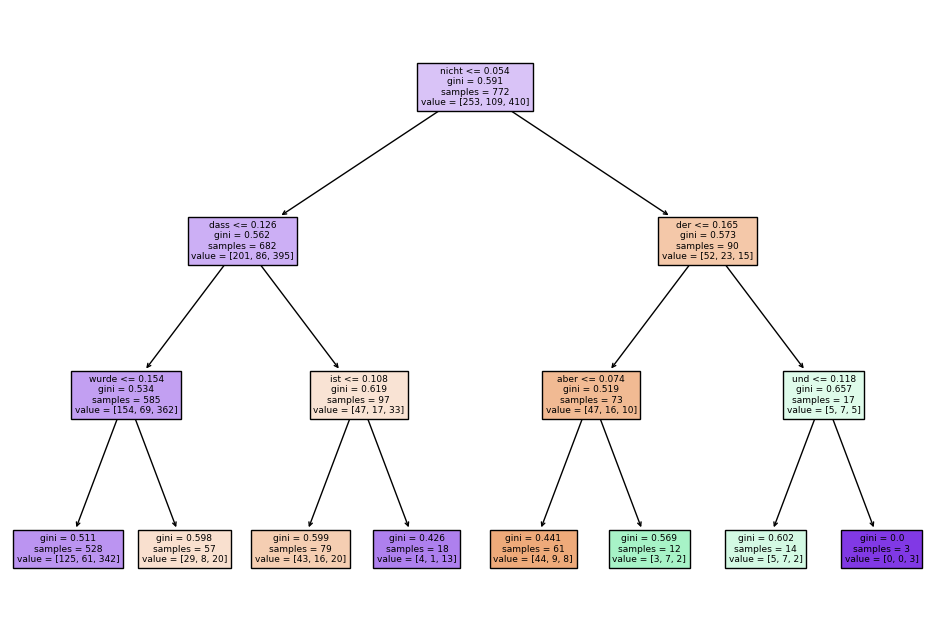

In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_de, y_de)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(vectorizer.get_feature_names_out()))
plt.show()